<a href="https://colab.research.google.com/github/berndheidemann/notebooks_fastai/blob/master/for_and_backward_propagation_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward propagation

In [0]:
import numpy as np

y = 5

x = np.array([-1, 2, 0])

w1 = np.array(
     [[0, -2, 4, -1],
      [3, 0, -10, 1],
      [1, -1, -2, 1]])

w2 = np.array([2,1,2,-2])

def relu(a):
  return np.maximum(a, 0)

In [0]:
z2=x@w1; z2

array([  6,   2, -24,   3])

In [0]:
a2 = relu(z2);a2

array([6, 2, 0, 3])

In [0]:
z3=w2.T@a2; z3

8

In [0]:
yhat=z3

In [0]:
loss = (y-yhat)**2

In [0]:
#oder in einem ausdruck:
loss = (y-relu(x@w1)@w2.T)**2

# Ein vollständiges neuronales Netz inklusive Backpropagation mit etwas Unterstützung von Pytorch

## Vorbereitungen

In [0]:
import torch

x = torch.tensor([-1., 2., 0.])

w1 = nn.Parameter(torch.tensor( [[0., -2., 4., -1.],
                                [3., 0., -10., 1.],
                                [1., -1., -2., 1.]]))   

w2 = nn.Parameter(torch.tensor([2.,1.,2.,-2.]))

In [0]:
y = 5

In [0]:
def relu(a):
  return torch.max(torch.tensor(0.), a)

In [151]:
yhat=(relu(x@w1)@w2).item(); yhat

8.0

In [152]:
loss = (y-yhat)**2; loss

9.0

## Hier kommt das eigentliche Netz

In [0]:
learnrate=0.0001

In [0]:
def train(i):
  yhat=(relu(x@w1)@w2)
  loss=(y-yhat)**2
  if i%10==0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    w1.sub_(learnrate*w1.grad)
    w2.sub_(learnrate*w2.grad)
    w1.grad.zero_()
    w2.grad.zero_()
    return loss.item()

In [155]:
losses=[]
for i in range(200):
  losses.append(train(i))

tensor(9., grad_fn=<PowBackward0>)
tensor(6.1680, grad_fn=<PowBackward0>)
tensor(4.2403, grad_fn=<PowBackward0>)
tensor(2.9221, grad_fn=<PowBackward0>)
tensor(2.0176, grad_fn=<PowBackward0>)
tensor(1.3951, grad_fn=<PowBackward0>)
tensor(0.9659, grad_fn=<PowBackward0>)
tensor(0.6694, grad_fn=<PowBackward0>)
tensor(0.4643, grad_fn=<PowBackward0>)
tensor(0.3222, grad_fn=<PowBackward0>)
tensor(0.2237, grad_fn=<PowBackward0>)
tensor(0.1554, grad_fn=<PowBackward0>)
tensor(0.1080, grad_fn=<PowBackward0>)
tensor(0.0751, grad_fn=<PowBackward0>)
tensor(0.0522, grad_fn=<PowBackward0>)
tensor(0.0363, grad_fn=<PowBackward0>)
tensor(0.0252, grad_fn=<PowBackward0>)
tensor(0.0176, grad_fn=<PowBackward0>)
tensor(0.0122, grad_fn=<PowBackward0>)
tensor(0.0085, grad_fn=<PowBackward0>)


In [156]:
yhat=(relu(x@w1)@w2).item(); yhat

5.076911449432373

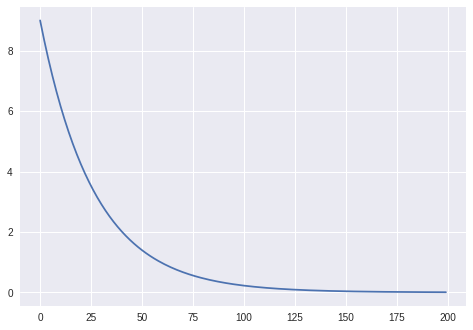

In [157]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()